<a href="https://www.kaggle.com/code/uyenlephuong/exploring-movie-trends-an-imdb-data-story?scriptVersionId=174649338" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/imdb-dataset-2023/imdb_data.csv', dtype='unicode')

In [3]:
# Display basic information and statistics
df.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [4]:
df.isnull().sum()

id                 0
primaryTitle       0
originalTitle      0
isAdult            0
runtimeMinutes     0
genres             0
averageRating      0
numVotes           0
budget             0
gross             51
release_date       5
directors          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3348 non-null   object
 1   primaryTitle    3348 non-null   object
 2   originalTitle   3348 non-null   object
 3   isAdult         3348 non-null   object
 4   runtimeMinutes  3348 non-null   object
 5   genres          3348 non-null   object
 6   averageRating   3348 non-null   object
 7   numVotes        3348 non-null   object
 8   budget          3348 non-null   object
 9   gross           3297 non-null   object
 10  release_date    3343 non-null   object
 11  directors       3348 non-null   object
dtypes: object(12)
memory usage: 314.0+ KB


In [6]:
df.describe()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
count,3348,3348,3348,3348,3348,3348,3348,3348,3348,3297,3343,3348
unique,3348,3295,3298,1,125,287,68,3328,343,3296,2805,1356
top,tt0035423,Robin Hood,Halloween,0,100,"Action,Adventure,Sci-Fi",6.5,128038,30000000,14400000.0,1997,Steven Spielberg
freq,1,3,3,3348,84,129,164,2,138,2,8,30


In [7]:
# Data type casting and handling missing values
df[['runtimeMinutes', 'numVotes', 'budget']] = df[['runtimeMinutes', 'numVotes', 'budget']].astype(int)
df['averageRating'] = df['averageRating'].astype(float)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').astype('Int64')

#Fill missing 'release_date' using interpolation method
df['release_date'] = pd.to_datetime(df['release_date'].interpolate(method='linear', limit_direction='forward'), errors='coerce')

# Fill missing 'gross' values with the median
df['gross'].fillna(df['gross'].median(), inplace=True)

In [8]:
unique_genres = df['genres'].str.split(',').explode().unique()
print(f'Number of genres: {len(unique_genres)}')
print(unique_genres)

Number of genres: 22
['Comedy' 'Fantasy' 'Romance' 'Adventure' 'Animation' 'War' 'Drama'
 'Biography' 'Sci-Fi' 'Thriller' 'Crime' 'Action' 'Family' 'Musical'
 'Music' 'Mystery' 'Western' 'Horror' 'History' 'Sport' 'Documentary'
 'News']


# Visualization

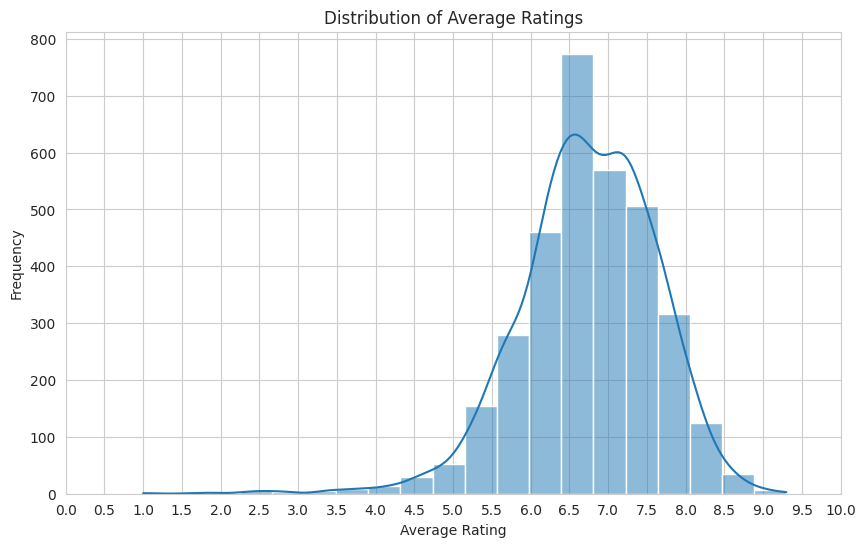

In [9]:
# Distribution of average ratings
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['averageRating'].dropna(), kde=True, bins=20)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 10.5, 0.5))
plt.show()

# *Most of the films' average ratings on IMDB fall around 6.5.*

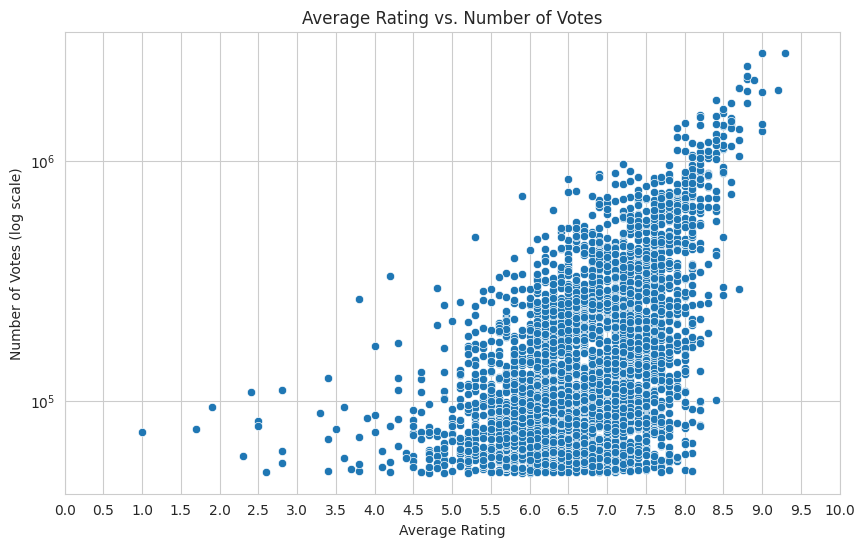

In [10]:
# Scatter plot of average rating vs. number of votes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='averageRating', y='numVotes')
plt.yscale('log')
plt.title('Average Rating vs. Number of Votes')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes (log scale)')
plt.xticks(np.arange(0, 10.5, 0.5))
plt.show()

# *There does not seem to be a strong relationship between average rating and the number of votes.*

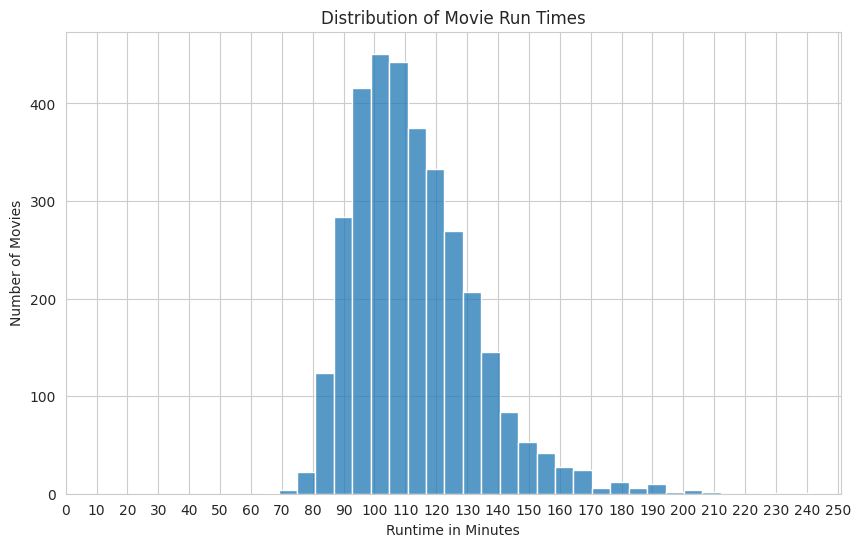

In [11]:
# Distribution of movie runtimes
plt.figure(figsize=(10, 6))
sns.histplot(df['runtimeMinutes'].dropna(), bins=30, kde=False)
plt.title('Distribution of Movie Run Times')
plt.xlabel('Runtime in Minutes')
plt.ylabel('Number of Movies')
plt.xticks(np.arange(0, 260, 10))
plt.show()

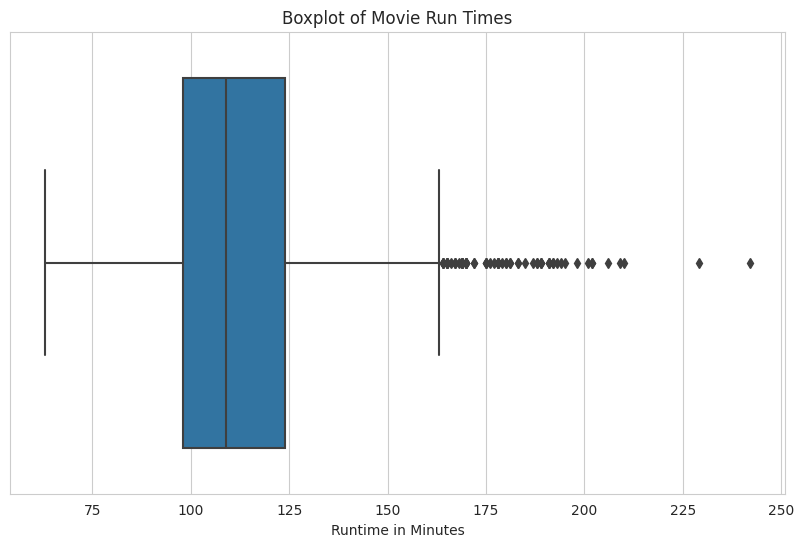

In [12]:
# Boxplot for runtime minutes
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['runtimeMinutes'].dropna())
plt.title('Boxplot of Movie Run Times')
plt.xlabel('Runtime in Minutes')
plt.show()

# *Most film durations fall around 100-125 minutes.*

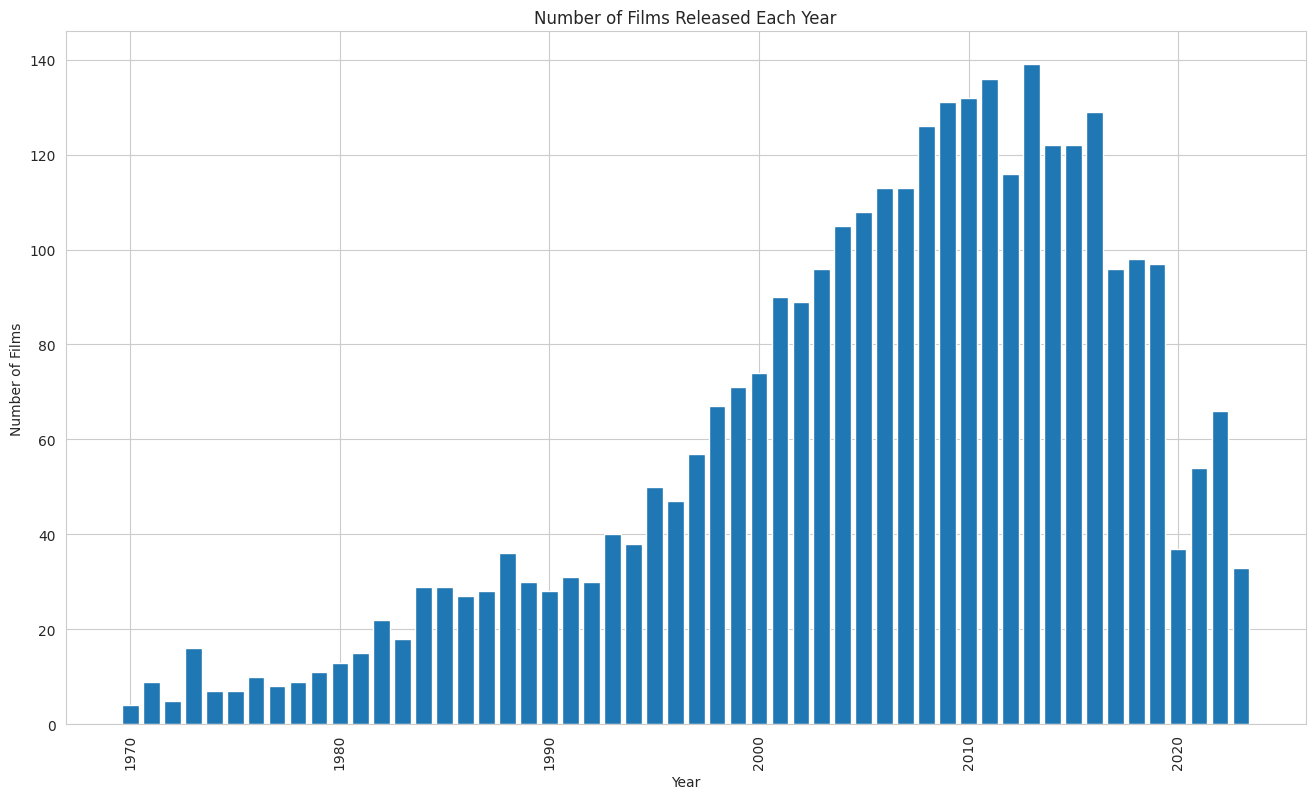

In [13]:
# Number of films released each year
df['release_year'] = df['release_date'].dt.year
year_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(16, 9))
plt.bar(year_counts.index, year_counts.values)
plt.title('Number of Films Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.xticks(rotation=90)
plt.show()

# *Number of films released each year has been increasing linearly since 1970, but dropped significantly during the COVID era (2020-2021), and then gradually bounced back in 2022.*

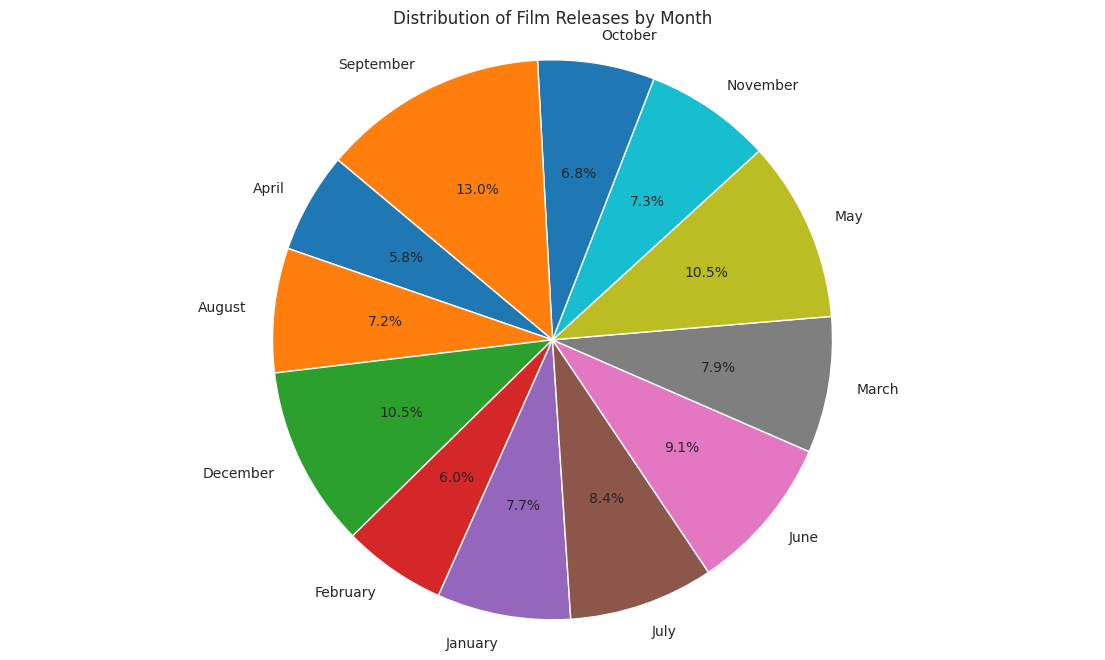

In [14]:
# Distribution of content releases by month
df['release_month'] = df['release_date'].dt.month_name()
month_counts = df['release_month'].value_counts().sort_index()
plt.figure(figsize=(14, 8))
plt.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Film Releases by Month')
plt.axis('equal')
plt.show()

# *Films are most likely to have their premieres in May, June, September, and December.*

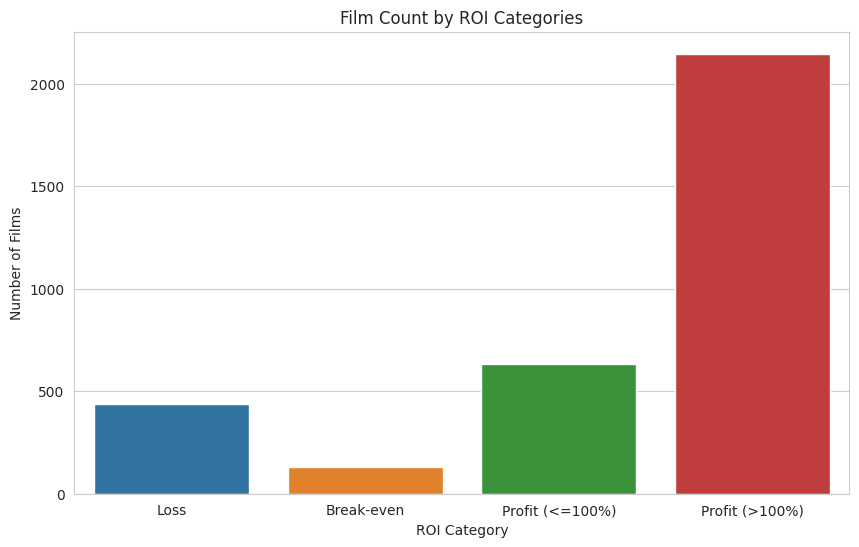

In [15]:
# ROI Analysis
df['roi'] = (df['gross'] - df['budget']) / df['budget']
roi_categories = pd.cut(df['roi'], bins=[-np.inf, -0.1, 0.1, 1, np.inf], labels=['Loss', 'Break-even', 'Profit (<=100%)', 'Profit (>100%)'])
roi_counts = roi_categories.value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=roi_counts.index, y=roi_counts.values)
plt.title('Film Count by ROI Categories')
plt.xlabel('ROI Category')
plt.ylabel('Number of Films')
plt.show()

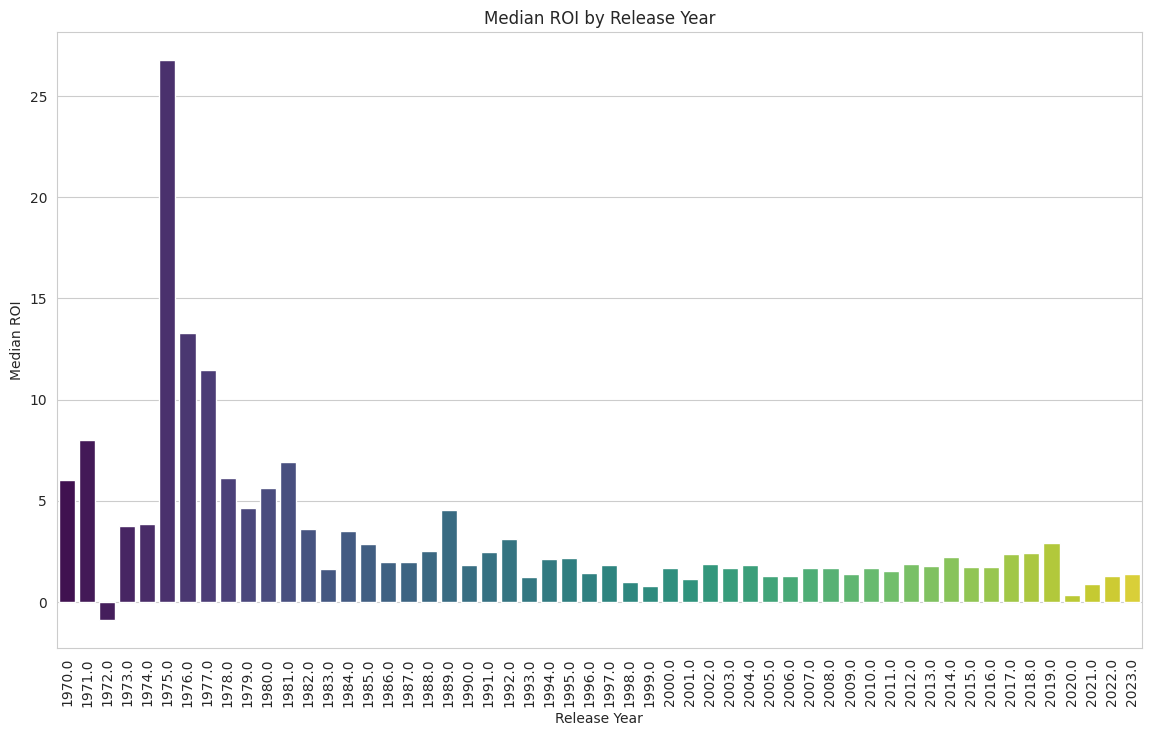

In [16]:
# Bar chart of the median ROI by release year
df['release_year'] = df['release_date'].dt.year
df['roi'] = (df['gross'] - df['budget']) / df['budget']
roi_by_year = df.groupby('release_year')['roi'].median().reset_index()
roi_by_year_sorted = roi_by_year.sort_values('roi', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=roi_by_year_sorted, x='release_year', y='roi', palette="viridis")
plt.xticks(rotation=90)
plt.title('Median ROI by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Median ROI')
plt.show()

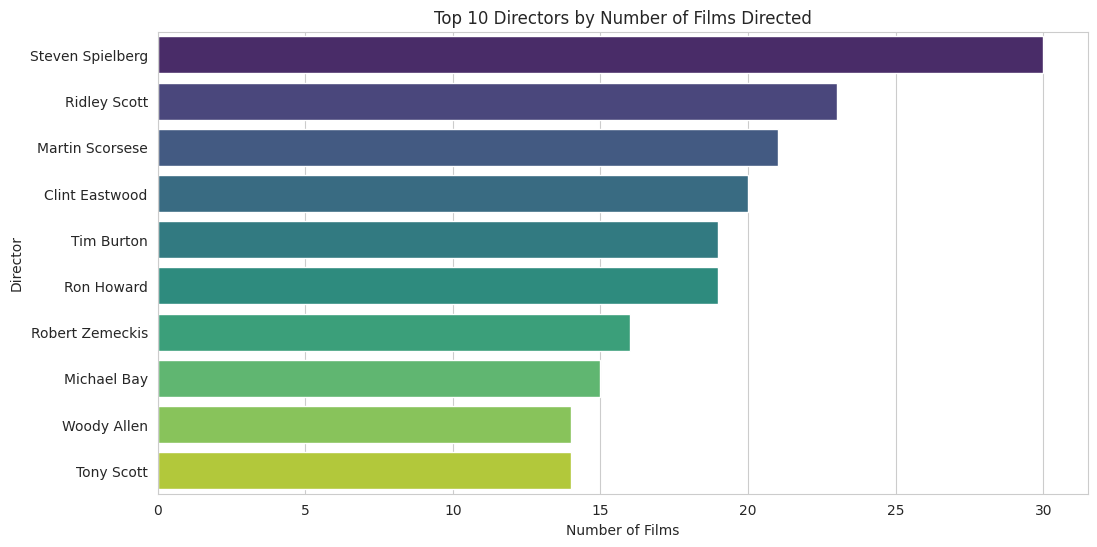

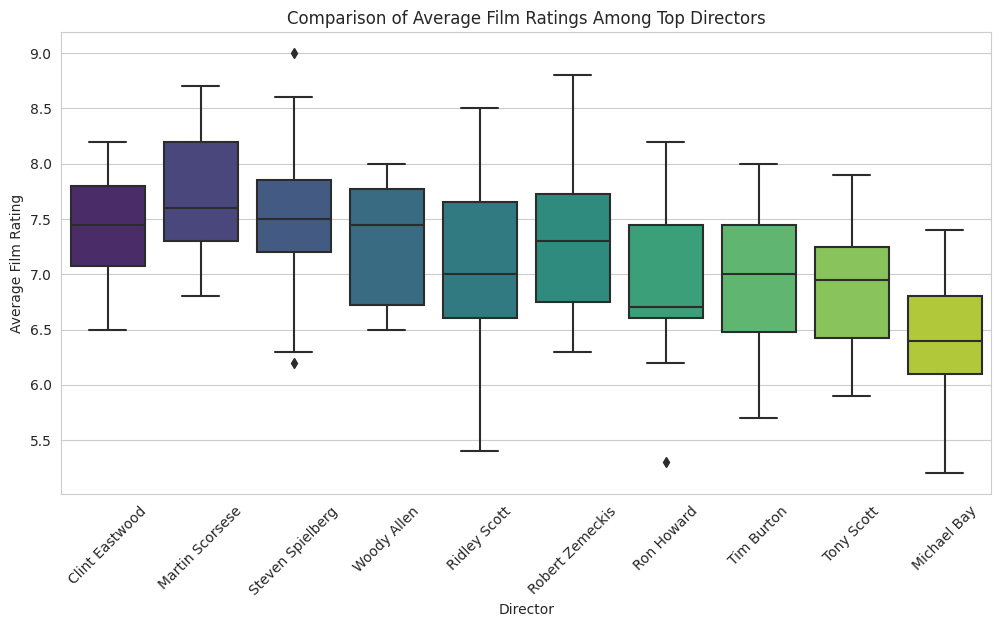

In [17]:
# Director Analysis
df_directors = df['directors'].str.split(',').explode()
top_directors = df_directors.value_counts().head(10)
top_directors_movies = df[df['directors'].isin(top_directors.index)]
top_directors_movies = top_directors_movies.assign(director=top_directors_movies['directors'].str.split(',')).explode('director')
top_directors_movies = top_directors_movies[top_directors_movies['director'].isin(top_directors.index)]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="viridis")
plt.title('Top 10 Directors by Number of Films Directed')
plt.xlabel('Number of Films')
plt.ylabel('Director')
plt.show()

# Boxplot to compare the average ratings of films among top directors
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_directors_movies, x='director', y='averageRating', palette="viridis")
plt.xticks(rotation=45)
plt.title('Comparison of Average Film Ratings Among Top Directors')
plt.xlabel('Director')
plt.ylabel('Average Film Rating')
plt.show()

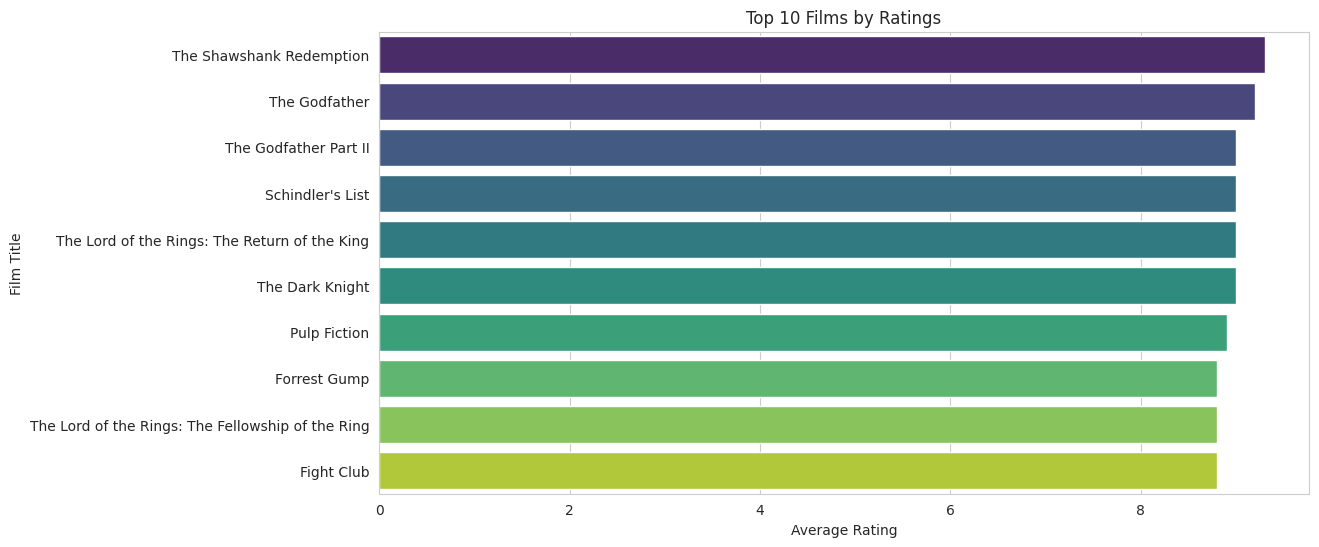

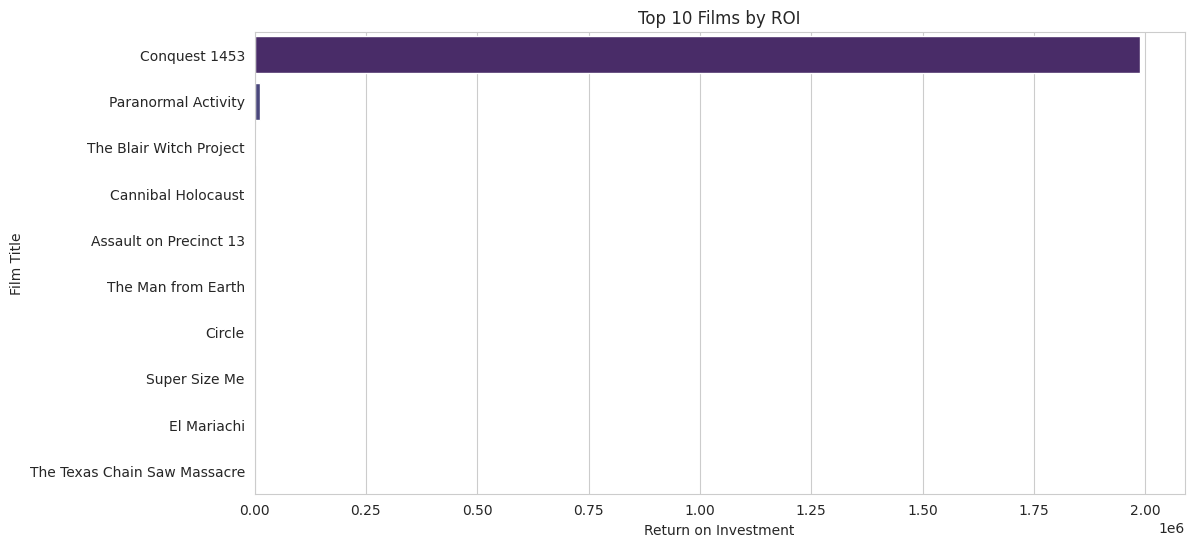

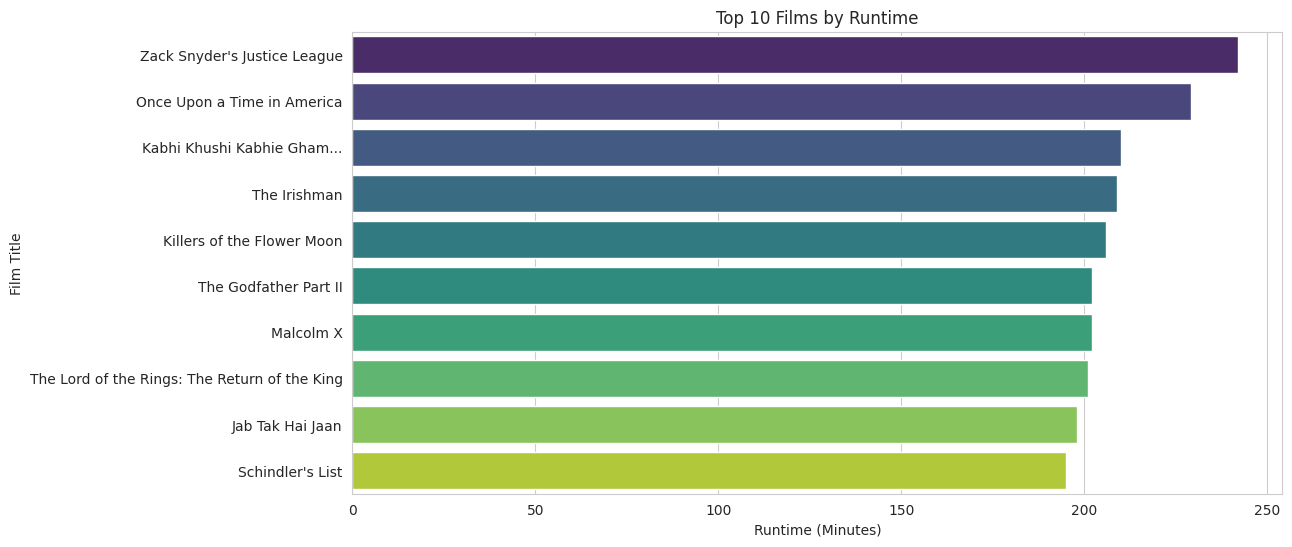

In [18]:
# Bar charts for top 10 films by ratings, by ROI, and by runtimes
def plot_top_films(df, column, title, xlabel, ylabel):
    top_films = df.nlargest(10, column)
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_films, x=column, y='primaryTitle', palette="viridis")
    plt.title(f'Top 10 Films by {title}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_top_films(df, 'averageRating', 'Ratings', 'Average Rating', 'Film Title')
plot_top_films(df, 'roi', 'ROI', 'Return on Investment', 'Film Title')
plot_top_films(df, 'runtimeMinutes', 'Runtime', 'Runtime (Minutes)', 'Film Title')

<center>
<p style="font-size:20pt; font-style:bold; text-align:center">
"THE END! THANKS FOR READING!!"
</p>
</center>
<center>You can find me on <a href="https://www.linkedin.com/in/uyenlephuong/">LinkedIn</a> and <a href="https://github.com/uyen-le">GitHub</a>.
</center>